_Centrality_ is a term to describe importance of individual nodes in a graph.
There has been a lot of research carried out in this topic for network analysis to answer the question,
"Which are the most important nodes (vertices) in a graph?"
Here is the list of different metrics to determine that, which I would like to discuss:

* [Degree Centrality](#Degree-Centrality)
* [Eigenvector Centrality](#Eigenvector-Centrality)
* [Katz Centrality](#Katz-Centrality)
* [PageRank](#Pagerank)
* [Hits Hubs and Authorities](#Hits-Hubs-and-Authorities)
* [Closeness Centrality](#Closeness-Centrality)
* [Betweenness Centrality](#Betweenness-Centrality)


I will be using [NetworkX Python](https://networkx.github.io/) (v1.11) library
along with [Matplotlib](https://matplotlib.org/) (v2.0.0).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# for Notebook
%matplotlib inline

First, I am defining a simple method to draw the graph and the centrality metrics as heatmap for nodes.

In [2]:
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G,pos, node_color=measures.values(),
      nodelist=measures.keys(), cmap='plasma', with_labels=False)
    edges = nx.draw_networkx_edges(G,pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

Zachary’s Karate Club graph is defined as the sample graph `G`.
It is basically a social network of members of a university karate club,
where undirected edges connects people who interact outside the club.
However, please **be aware that**, not all centrality measures equally suit for
determining centrality of nodes in a social network.
I picked this graph as a sample input.

In [3]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

## Degree Centrality

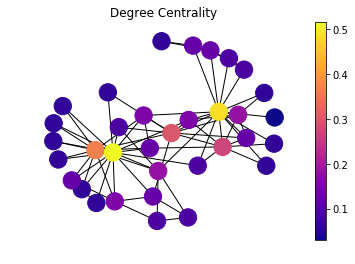

In [4]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

_Degree_ of a node is defined as number of edges that it has.
The basic intuition is that, nodes with more connections are
more influential and important in a network.
In another words, the person with the more friend count in a social network,
the more cited paper (_in-degree_) in a scientific citation network
is the one that is more central according to this metric.

## Eigenvector Centrality

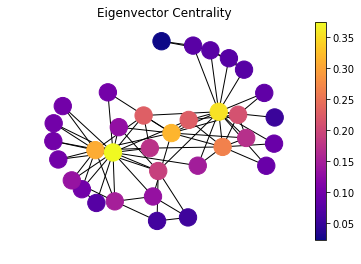

In [5]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

_Eigenvector centrality_ is a basic extension of _degree centrality_,
which defines centrality of a node as proportional to its neighbors' importance.
When we sum up all connections of a node, not all neighbors are equally important.
Let's consider two nodes in a friend network with same degree,
the one who is connected to more central nodes should be more central.

First, we define a initial guess for the centrality of nodes in a graph as $x_i=1$.
Now we are going to iterate for the new centrality value $x_i'$ for node $i$ as following:

$$
  x_i' = \sum_{j} A_{ij}x_j
$$

Here $ A_{ij} $ is a element of _the adjacency matrix_,
where it gives $ 1 $ or $ 0 $ for whether an edge exists between nodes $ i $ and $ j $.
it can be also written in matrix notation as $ \mathbf{x'} = \mathbf{Ax} $.
We iterate over t steps to find the vector $ \mathbf{x}(t) $ as:

$$
  \mathbf{x}(t) = \mathbf{A^t x}(0)
$$

The drawing also shows that, the nodes which have the same number of connections are not necessarily in the same heatmap color.
The one that is connected to more central nodes are more _hot_ in this visualization.

Here we can see from the definition,
it is a problematic measure for directed graphs.
Let's say that a new research paper is published and it references a handful other papers.
It would not contribute to any of those referenced papers in this citation network
because it is not cited by any other papers.
In other words, _eigenvector centrality_ would not take zero _in-degree_ nodes into account
in directed graphs such as citation networks.

## Katz Centrality

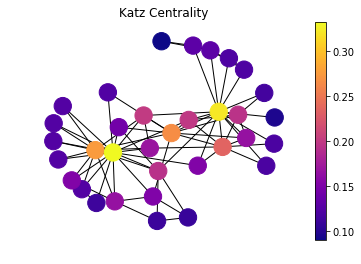

In [6]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

_Katz centrality_ introduces two positive constants $ \alpha $ and $ \beta $
to tackle the problem of _eigenvector centrality_ with zero in-degree nodes
in directed networks:

$$
    x_i = \alpha \sum_{j} A_{ij} x_j + \beta,
$$

again $ A_{ij} $ is a element of _the adjacency matrix_,
and it can be also written in matrix notation as $ \mathbf{x} = \alpha \mathbf{Ax} + \beta \mathbf{1} $.
This $ \beta $ constant gives a _free_ centrality contribution for all nodes
even though they don't get any contribution from other nodes.
The existence of a node alone would provide it some importance.
$ \alpha $ constant determines the balances between the contribution from other nodes and the _free_ constant.

Although this method is introduced as a solution for directed graphs,
it can be useful for some applications of undirected graphs as well.

## PageRank

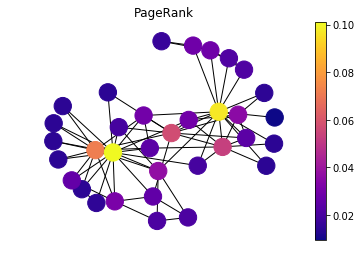

In [7]:
draw(G, pos, nx.pagerank(G, alpha=0.85), 'PageRank')

PageRank is introduce by the founders of Google to rank websites on the web.
It can be considered as a extension of _Katz centrality_.
The websites on the web can be modeled as a directed graph,
where hypermedia links between websites determines the edges.
Let's consider a popular web directory website with high _Katz centrality_ value which has millions of links to other websites.
It would contribute to every single website significantly, nevertheless all are important.
To overcome that issue, contribution value is divided by _out-degree_ of the node:

$$
    x_i = \alpha \sum_{j} A_{ij} \frac{x_j}{k_j^{out}} + \beta,
$$

where $ k_j^{out} = 1 $ for zero out-degree nodes to avoid division by zero.
It can also be written in matrix terms as:

$$
    \mathbf{x} = \alpha \mathbf{A D^{-1} x} + \beta \mathbf{1},
$$

where $  \mathbf{D} $ is a diagonal matrix with elements $ D_{ii} = max(k_i^{out}, 1) $.

## Hits Hubs and Authorities

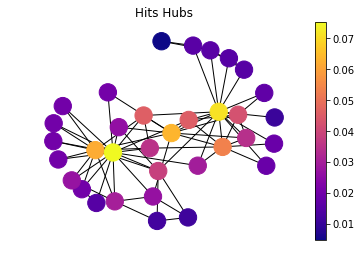

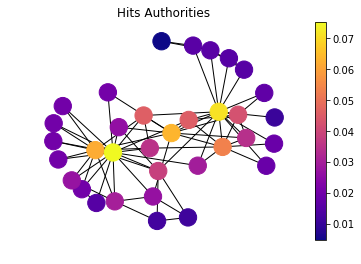

In [8]:
h,a = nx.hits(G)
draw(G, pos, h, 'Hits Hubs')
draw(G, pos, a, 'Hits Authorities')

## Closeness Centrality

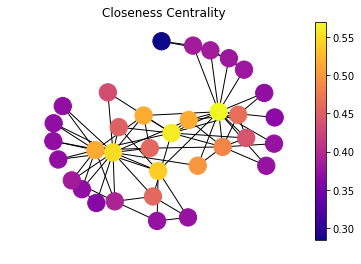

In [9]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

## Betweenness Centrality

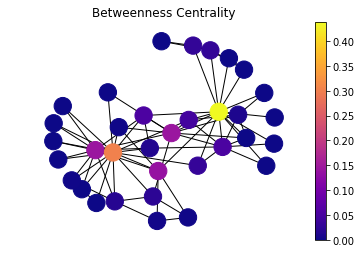

In [10]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

**References and further reading**

* Newman, Mark. *Networks: An Introduction* (pp. 168-234, Chapter 7: Measures and Metrics)., Oxford University Press, 2010.
* Zachary, Wayne W. *An Information Flow Model for Conflict and Fission in Small Groups*., 1977.